In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scienceplots
import seaborn as sns

groups = ["primaryEver","primaryNivo","metaEver","metaNivo"]
dic = {}
df = pd.DataFrame()
for i in range(1,11):
    for j in groups:
        temp = pd.read_csv(f"network_stat/{j}_all_sample_k_{i*10}_network_stats.txt"\
                      ,sep="\t")
        temp["para_k"] = f"k_{i*10}%"
        df = pd.concat([df,temp],ignore_index=True)
"""
for j in groups: 
    temp = pd.read_csv(f"network_stat/{j}_all_sample_k_10_0.001_network_stats.txt"\
                      ,sep="\t")
    temp["para_k"] = f"k_10%_0.001"
    df = pd.concat([df,temp],ignore_index=True)

for j in groups: 
    temp = pd.read_csv(f"network_stat/{j}_all_sample_k_10_above_network_stats.txt"\
                      ,sep="\t")
    temp["para_k"] = f"expr>log2"
    df = pd.concat([df,temp],ignore_index=True)
"""
df
#df_cl = pd.read_csv("braun_data_clinical_data.csv")

,sample_name,density,r2,node_count,edge_count,kmean,kmedian,kmax,density.1,connected?,para_k
0,./all_sample_k_10/sample_specific_EA595473.txt,0.015687,0.771460,20392,3261427,319.873186,125.0,12304,0.015687,True,k_10%
1,./all_sample_k_10/sample_specific_EA595564.txt,0.018565,0.972204,19833,3650974,368.171633,90.0,10525,0.018565,False,k_10%
2,./all_sample_k_10/sample_specific_EA595565.txt,0.015310,0.695286,20354,3171177,311.602339,120.0,11239,0.015310,False,k_10%
3,./all_sample_k_10/sample_specific_EA595620.txt,0.020324,0.983899,19235,3759605,390.912919,82.0,9344,0.020324,False,k_10%
4,./all_sample_k_10/sample_specific_EA595621.txt,0.017396,0.814518,19941,3458469,346.870167,90.0,11721,0.017396,False,k_10%
...,...,...,...,...,...,...,...,...,...,...,...
3125,./all_sample_k_100/sample_specific_RCC_90_T_SC...,0.050545,0.952121,17339,7597506,876.348809,52.0,11239,0.050545,True,k_100%
3126,./all_sample_k_100/sample_specific_RCC_93_T_SC...,0.026443,0.382286,20541,5578365,543.144443,49.0,16844,0.026443,True,k_100%
3127,./all_sample_k_100/sample_specific_RCC_96_T_SC...,0.026128,0.394660,20543,5512963,536.724237,50.0,16927,0.026128,True,k_100%
3128,./all_sample_k_100/sample_specific_RCC_99_T_SC...,0.032046,0.691698,20447,6698641,655.219934,50.0,14760,0.032046,True,k_100%


In [2]:
#[ len(df["para_k"][ df["para_k"] == i]) for i in set(df["para_k"])]
print(df[ df["para_k"] == "k_10%"])

                                           sample_name   density        r2  \
0       ./all_sample_k_10/sample_specific_EA595473.txt  0.015687  0.771460   
1       ./all_sample_k_10/sample_specific_EA595564.txt  0.018565  0.972204   
2       ./all_sample_k_10/sample_specific_EA595565.txt  0.015310  0.695286   
3       ./all_sample_k_10/sample_specific_EA595620.txt  0.020324  0.983899   
4       ./all_sample_k_10/sample_specific_EA595621.txt  0.017396  0.814518   
..                                                 ...       ...       ...   
308  ./all_sample_k_10/sample_specific_RCC_90_T_SCR...  0.018401  0.819604   
309  ./all_sample_k_10/sample_specific_RCC_93_T_SCR...  0.012473  0.481976   
310  ./all_sample_k_10/sample_specific_RCC_96_T_SCR...  0.012469  0.482045   
311  ./all_sample_k_10/sample_specific_RCC_99_T_SCR...  0.013483  0.572328   
312              ./all_sample_k_10/cohort_metaNivo.txt  0.012536  0.462911   

     node_count  edge_count       kmean  kmedian   kmax  densit

In [3]:
for i in range(1,11):
    df["sample_name"] = [sample\
                         .replace(f'./all_sample_k_{i*10}/sample_specific_',"")\
    .replace(f'.txt',"") for sample in df["sample_name"].tolist() ]
df["sample_name"] = [sample\
                         .replace(f'./all_sample_k_10_0.001/sample_specific_',"")\
    .replace(f'.txt',"") for sample in df["sample_name"].tolist() ]
df["sample_name"] = [sample\
                         .replace(f'./all_sample_k_10_above/sample_specific_',"")\
    .replace(f'.txt',"") for sample in df["sample_name"].tolist() ]
df

,sample_name,density,r2,node_count,edge_count,kmean,kmedian,kmax,density.1,connected?,para_k
0,EA595473,0.015687,0.771460,20392,3261427,319.873186,125.0,12304,0.015687,True,k_10%
1,EA595564,0.018565,0.972204,19833,3650974,368.171633,90.0,10525,0.018565,False,k_10%
2,EA595565,0.015310,0.695286,20354,3171177,311.602339,120.0,11239,0.015310,False,k_10%
3,EA595620,0.020324,0.983899,19235,3759605,390.912919,82.0,9344,0.020324,False,k_10%
4,EA595621,0.017396,0.814518,19941,3458469,346.870167,90.0,11721,0.017396,False,k_10%
...,...,...,...,...,...,...,...,...,...,...,...
3125,RCC_90_T_SCR,0.050545,0.952121,17339,7597506,876.348809,52.0,11239,0.050545,True,k_100%
3126,RCC_93_T_SCR,0.026443,0.382286,20541,5578365,543.144443,49.0,16844,0.026443,True,k_100%
3127,RCC_96_T_SCR,0.026128,0.394660,20543,5512963,536.724237,50.0,16927,0.026128,True,k_100%
3128,RCC_99_T_SCR,0.032046,0.691698,20447,6698641,655.219934,50.0,14760,0.032046,True,k_100%


In [4]:
df[df["para_k"]=="k_10%"]["r2"].mean()

0.6964036565311327

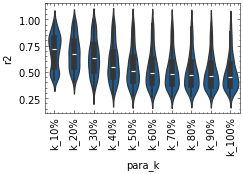

In [6]:
plt.style.use(['science','no-latex'])
plt.rc('font', family='DejaVu Sans')
plt.rcParams["text.usetex"] = False
#print(max(df_stat["r2"]))
sns.violinplot(data= df, x="para_k",y="r2")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('s1.tif',dpi=600)

In [7]:
df_cl = pd.read_csv("braun_data_clinical_data.csv")

In [8]:
df_stat = pd.merge(df,df_cl,how="left",left_on="sample_name", right_on="RNA_ID" ) 

In [9]:
df_stat.columns

Index(['sample_name', 'density', 'r2', 'node_count', 'edge_count', 'kmean',
       'kmedian', 'kmax', 'density.1', 'connected?', 'para_k', 'RNA_ID',
       'Cohort', 'Arm', 'Sex', 'Age', 'MSKCC',
       'Tumor_Sample_Primary_or_Metastasis', 'ORR', 'Benefit', 'OS', 'OS_CNSR',
       'PFS', 'PFS_CNSR'],
      dtype='object')

In [10]:
dftemp = df_stat[(df_stat["Arm"]=="NIVOLUMAB")&(df_stat["Tumor_Sample_Primary_or_Metastasis"]=="PRIMARY")].copy()

In [11]:
dftemp1 = dftemp[ dftemp["para_k"] == "k_10%"]
dftemp1[dftemp1['edge_count']< 3700000]

,sample_name,density,r2,node_count,edge_count,kmean,kmedian,kmax,density.1,connected?,...,Sex,Age,MSKCC,Tumor_Sample_Primary_or_Metastasis,ORR,Benefit,OS,OS_CNSR,PFS,PFS_CNSR
93,EA595500,0.017015,0.637720,20443,3555198,347.815683,94.0,12004,0.017015,False,...,M,61.0,INTERMEDIATE,PRIMARY,PD,NCB,3.548255,1.0,2.135524,1.0
99,EA595654,0.017152,0.672055,20343,3548944,348.910583,103.0,12044,0.017152,True,...,M,70.0,INTERMEDIATE,PRIMARY,CRPR,CB,58.579055,0.0,11.268994,1.0
100,EA595719,0.017833,0.865338,20081,3595418,358.091529,106.0,14270,0.017833,False,...,F,64.0,FAVORABLE,PRIMARY,SD,ICB,53.223819,0.0,7.162218,1.0
101,EA595720,0.016992,0.627135,20473,3560950,347.867924,119.0,12062,0.016992,False,...,M,48.0,POOR,PRIMARY,SD,CB,36.960986,1.0,16.164271,1.0
102,EA632123,0.016817,0.693380,20424,3507307,343.449569,120.0,13319,0.016817,True,...,M,64.0,INTERMEDIATE,PRIMARY,PD,NCB,12.747433,1.0,1.839836,1.0
103,EA632234,0.017293,0.711388,20300,3562911,351.025714,113.0,11825,0.017293,False,...,M,58.0,INTERMEDIATE,PRIMARY,SD,CB,16.919918,1.0,8.344969,1.0
104,EA632688,0.016983,0.687061,20424,3542058,346.852526,113.0,13247,0.016983,True,...,M,62.0,INTERMEDIATE,PRIMARY,CRPR,CB,59.433265,0.0,6.505133,1.0
106,EA632768,0.017683,0.762113,20433,3691253,361.303088,113.0,12806,0.017683,True,...,F,53.0,FAVORABLE,PRIMARY,NE,ICB,10.151951,1.0,1.215606,1.0
107,EA632802,0.017292,0.668661,20491,3630025,354.304329,121.0,11792,0.017292,True,...,M,75.0,INTERMEDIATE,PRIMARY,PD,ICB,41.527721,1.0,9.954825,1.0
108,EA632813,0.016890,0.674264,20446,3530226,345.321921,121.5,12870,0.016890,False,...,F,60.0,FAVORABLE,PRIMARY,SD,ICB,13.963039,1.0,5.848049,1.0


In [12]:
df_stat["Arm"]

0       EVEROLIMUS
1       EVEROLIMUS
2       EVEROLIMUS
3       EVEROLIMUS
4       EVEROLIMUS
           ...    
3125     NIVOLUMAB
3126     NIVOLUMAB
3127     NIVOLUMAB
3128     NIVOLUMAB
3129           NaN
Name: Arm, Length: 3130, dtype: object

In [32]:
cohort_para = [i for i in df_stat["sample_name"] if "all" in i]
print(len(cohort_para))
print(df_stat.shape)
df_stat = df_stat[~df_stat["sample_name"].isin(cohort_para)].copy()

40
(3130, 24)


In [38]:
dftemp11 = df_stat[["para_k","r2","Arm","Tumor_Sample_Primary_or_Metastasis"]]

<Axes: xlabel='para_k', ylabel='r2'>

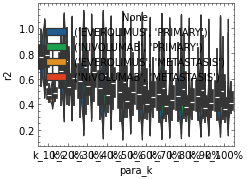

In [41]:
sns.violinplot(data=dftemp11, x="para_k", y="r2", hue=dftemp11[["Arm","Tumor_Sample_Primary_or_Metastasis"]].apply(tuple, axis=1), split=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'k_10%'),
  Text(1, 0, 'k_20%'),
  Text(2, 0, 'k_30%'),
  Text(3, 0, 'k_40%'),
  Text(4, 0, 'k_50%'),
  Text(5, 0, 'k_60%'),
  Text(6, 0, 'k_70%'),
  Text(7, 0, 'k_80%'),
  Text(8, 0, 'k_90%'),
  Text(9, 0, 'k_100%')])

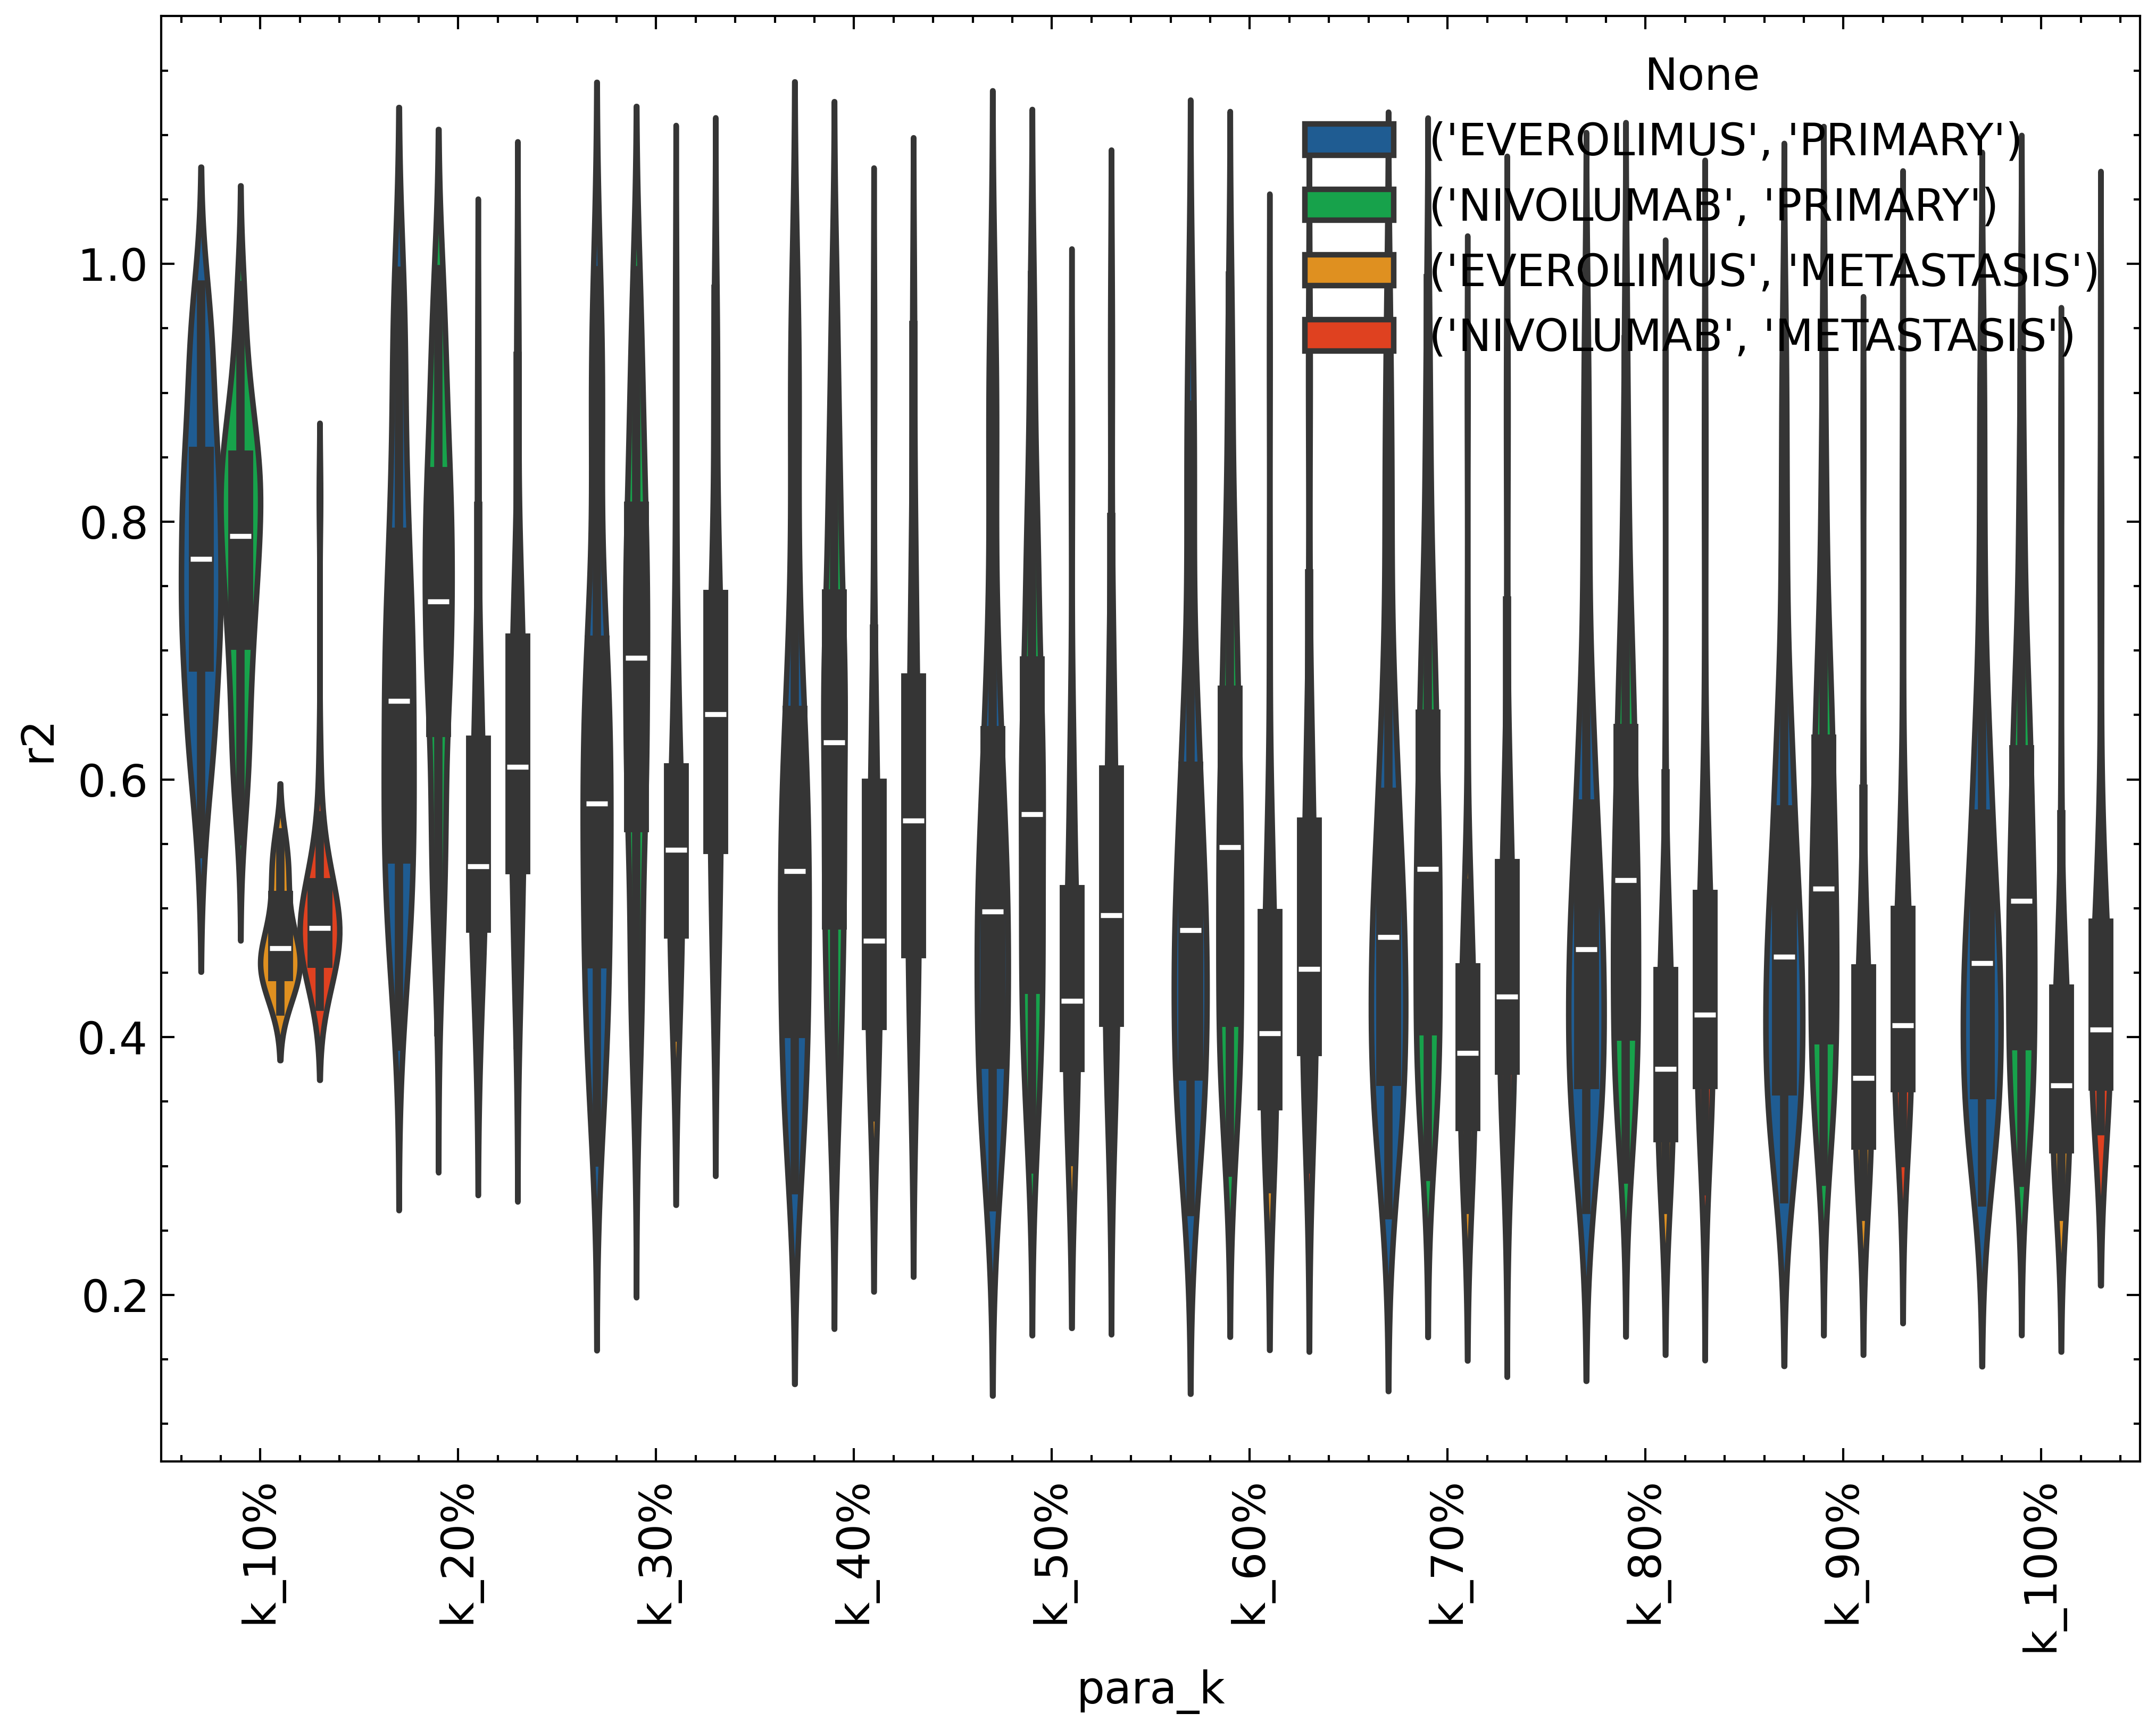

In [43]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=600)

df_stat.replace("k_10_0.001","zscore",inplace=True)
sns.violinplot(data=df_stat, x="para_k", y="r2", hue=df_stat[["Arm","Tumor_Sample_Primary_or_Metastasis"]].apply(tuple, axis=1))
plt.xticks(rotation=90)

In [44]:
cate = df_stat.columns.tolist()[1:8]
cate

['density', 'r2', 'node_count', 'edge_count', 'kmean', 'kmedian', 'kmax']

In [45]:
df_stat["node_count"] = df_stat["node_count"].astype("int64")
df_stat["edge_count"] = df_stat["edge_count"].astype("int64")
df_stat["kmax"] = df_stat["kmax"].astype("int64")
print(df_stat.dtypes)

sample_name                            object
density                               float64
r2                                    float64
node_count                              int64
edge_count                              int64
kmean                                 float64
kmedian                               float64
kmax                                    int64
density.1                             float64
connected?                               bool
para_k                                 object
RNA_ID                                 object
Cohort                                 object
Arm                                    object
Sex                                    object
Age                                   float64
MSKCC                                  object
Tumor_Sample_Primary_or_Metastasis     object
ORR                                    object
Benefit                                object
OS                                    float64
OS_CNSR                           

In [46]:
s1r2 = df_stat[(df_stat["para_k"]=="k_10%")&(df_stat["Arm"]=="NIVOLUMAB")]["r2"]
s2r2= df_stat[(df_stat["para_k"]=="k_10%")&(df_stat["Arm"]=="EVEROLIMUS")]["r2"]
import numpy as np
import scipy
print(np.mean(s1r2),np.mean(s2r2))
print(scipy.stats.ttest_ind(s1r2,s2r2,\
                            equal_var=[scipy.stats.levene(s1r2,s2r2)[1] > 0.05]))

0.7032418013067794 0.6878113624911601
TtestResult(statistic=0.8399085016343268, pvalue=0.4016132964033684, df=307.0)


0.01606265854283003


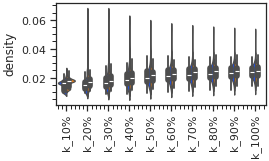

0.6964036565311327


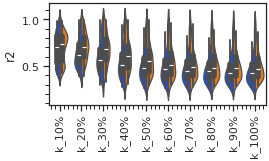

20357.546325878593


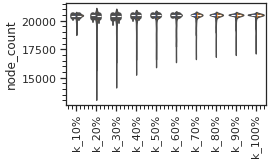

3317168.827476038


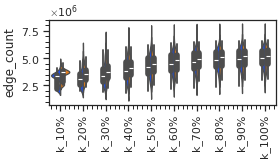

326.3971325935101


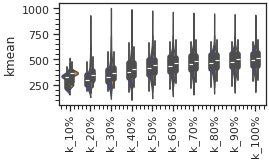

116.55271565495208


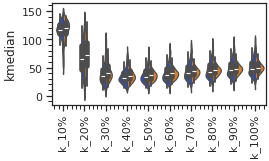

9320.41214057508


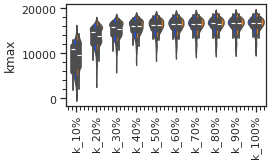

In [47]:
#'density', 'r2', 'node_count', 'edge_count', 'kmean', 'kmedian', 'kmax'
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="ticks", palette="bright")
for i in cate:
    df_stat[i].astype(float)
    print(df[df["para_k"]=="k_10%"][i].mean())
    plt.figure(figsize=(4,2.5))
    sns.violinplot(data=df_stat, x="para_k", y=i, hue="Arm", split=True)
    plt.legend([],[], frameon=False)
    #plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
    #plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.tight_layout()
    plt.savefig(f's1_{i}.svg',dpi=300)
    plt.show()
    #plt.close() 
    

In [111]:
s1r2 = df_stat[(df_stat["para_k"]=="k_10%")&(df_stat["Tumor_Sample_Primary_or_Metastasis"]=="PRIMARY")]["r2"]
s2r2= df_stat[(df_stat["para_k"]=="k_10%")&(df_stat["Tumor_Sample_Primary_or_Metastasis"]=="METASTASIS")]["r2"]
import numpy as np
import scipy
print(np.mean(s1r2),np.mean(s2r2))
print(scipy.stats.ranksums(s1r2, s2r2))
print(scipy.stats.ttest_ind(s1r2,s2r2,\
                            equal_var=[scipy.stats.levene(s1r2,s2r2)[1] > 0.05]))

0.7746519238242285 0.4882679420967684
RanksumsResult(statistic=13.27086202180715, pvalue=3.416280915579313e-40)
TtestResult(statistic=23.504019366086172, pvalue=1.3394917015046514e-70, df=307.0)


In [105]:
df_stat[df_stat["para_k"]=="k_10%"]

,sample_name,density,r2,node_count,edge_count,kmean,kmedian,kmax,density.1,connected?,...,Sex,Age,MSKCC,Tumor_Sample_Primary_or_Metastasis,ORR,Benefit,OS,OS_CNSR,PFS,PFS_CNSR
0,EA595473,0.015687,0.771460,20392,3261427,319.873186,125.0,12304,0.015687,True,...,M,61.0,FAVORABLE,PRIMARY,CRPR,CB,42.283368,1.0,26.743326,1.0
1,EA595564,0.018565,0.972204,19833,3650974,368.171633,90.0,10525,0.018565,False,...,M,65.0,INTERMEDIATE,PRIMARY,SD,CB,23.950719,1.0,22.110883,1.0
2,EA595565,0.015310,0.695286,20354,3171177,311.602339,120.0,11239,0.015310,False,...,F,69.0,INTERMEDIATE,PRIMARY,PD,NCB,9.856263,1.0,1.708419,1.0
3,EA595620,0.020324,0.983899,19235,3759605,390.912919,82.0,9344,0.020324,False,...,M,74.0,POOR,PRIMARY,SD,CB,11.498973,1.0,7.359343,1.0
4,EA595621,0.017396,0.814518,19941,3458469,346.870167,90.0,11721,0.017396,False,...,M,56.0,POOR,PRIMARY,NE,ICB,0.689938,1.0,0.689938,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,RCC_73_T_SCR,0.012424,0.480968,20543,2621408,255.211800,138.0,6186,0.012424,True,...,MALE,77.0,NaN,METASTASIS,PD,NCB,5.852055,1.0,1.906849,1.0
308,RCC_90_T_SCR,0.018401,0.819604,20191,3750584,371.510475,54.0,6676,0.018401,False,...,MALE,54.0,NaN,METASTASIS,PD,NCB,16.405479,1.0,1.183562,1.0
309,RCC_93_T_SCR,0.012473,0.481976,20545,2632177,256.235288,136.0,7968,0.012473,True,...,MALE,64.0,NaN,METASTASIS,PR,CB,22.487671,1.0,16.438356,1.0
310,RCC_96_T_SCR,0.012469,0.482045,20542,2630614,256.120534,133.0,7623,0.012469,True,...,FEMALE,75.0,NaN,METASTASIS,PD,NCB,19.134247,0.0,1.216438,1.0


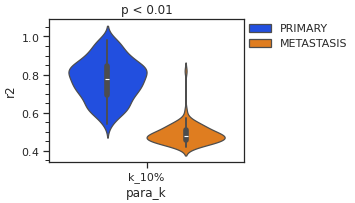

In [113]:
sns.violinplot(data=df_stat[df_stat["para_k"]=="k_10%"], x="para_k", y="r2", hue="Tumor_Sample_Primary_or_Metastasis")
plt.legend([],[], frameon=False)
plt.legend(bbox_to_anchor=(1.55, 1), borderaxespad=0)
plt.title("p < 0.01")
plt.savefig(f's1_r2_pm_p_value.svg',dpi=300)

In [81]:
for i in cate:
    print(i,df_stat[df_stat["para_k"]=="k_10%"][i].mean())


density 0.016077403772905775
r2 0.6967999676264723
node_count 20357.333333333332
edge_count 3320160.2459546924
kmean 326.6938107323509
kmedian 116.44660194174757
kmax 9405.88996763754


In [102]:
df_stat[df_stat["para_k"]=="k_10%"].groupby(["Arm","Tumor_Sample_Primary_or_Metastasis"])["edge_count"].mean().tolist()

[2176807.3513513515,
 3458841.5760869565,
 2640410.1063829786,
 3782518.3759398498]

In [100]:
for i in cate:
    print(i,(df_stat[df_stat["para_k"]=="k_10%"].groupby(["Arm","Tumor_Sample_Primary_or_Metastasis"])[i].mean()))

density Arm         Tumor_Sample_Primary_or_Metastasis
EVEROLIMUS  METASTASIS                            0.010322
            PRIMARY                               0.016868
NIVOLUMAB   METASTASIS                            0.012530
            PRIMARY                               0.018385
Name: density, dtype: float64
r2 Arm         Tumor_Sample_Primary_or_Metastasis
EVEROLIMUS  METASTASIS                            0.477616
            PRIMARY                               0.772346
NIVOLUMAB   METASTASIS                            0.496653
            PRIMARY                               0.776247
Name: r2, dtype: float64
node_count Arm         Tumor_Sample_Primary_or_Metastasis
EVEROLIMUS  METASTASIS                            20538.216216
            PRIMARY                               20273.858696
NIVOLUMAB   METASTASIS                            20533.000000
            PRIMARY                               20302.676692
Name: node_count, dtype: float64
edge_count Arm         Tu

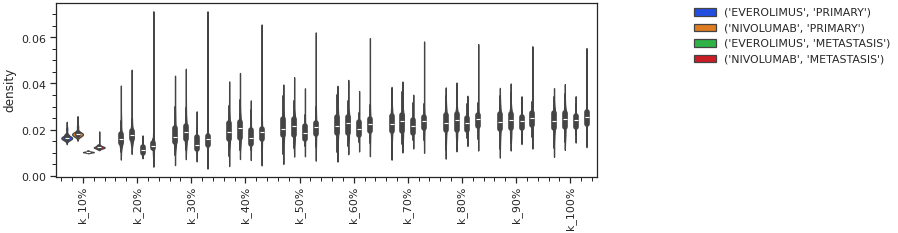

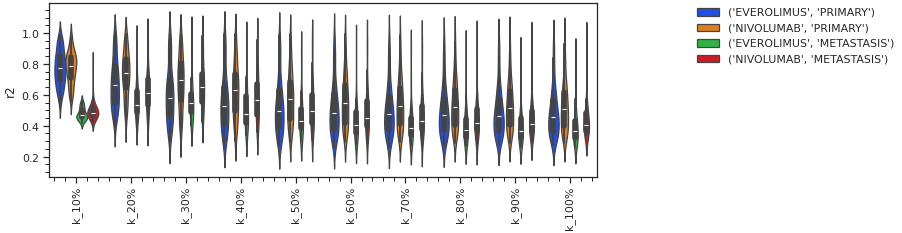

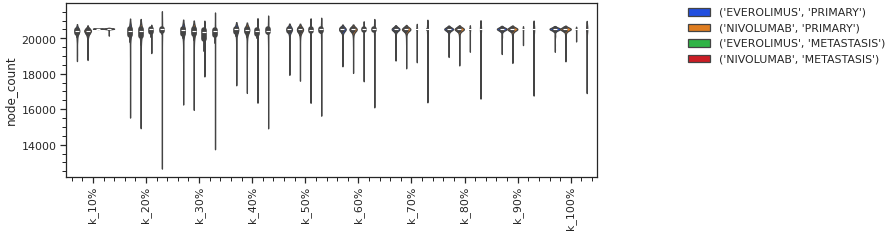

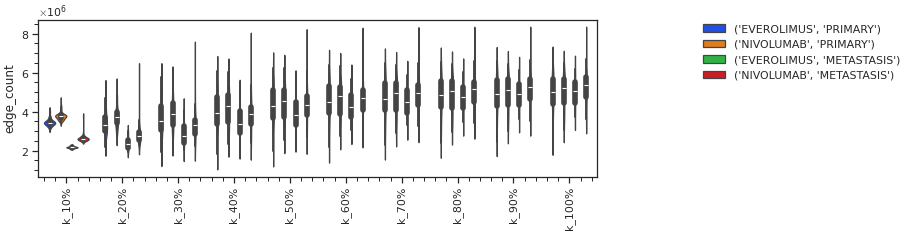

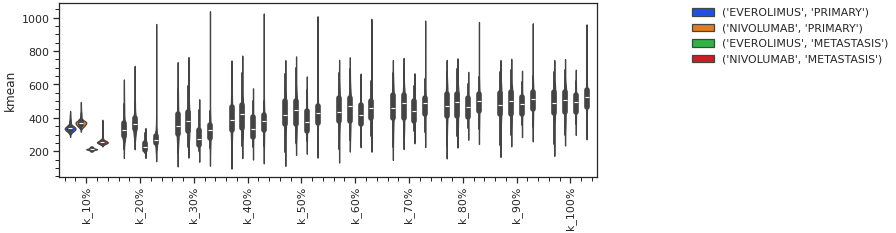

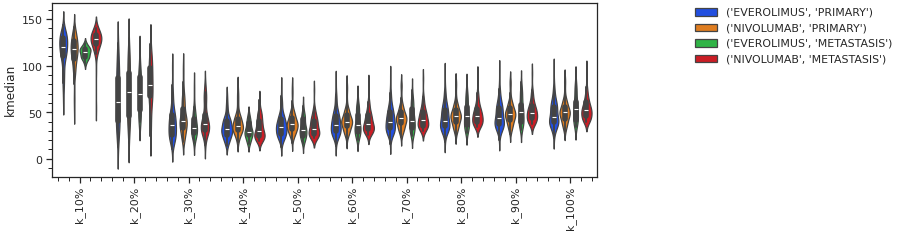

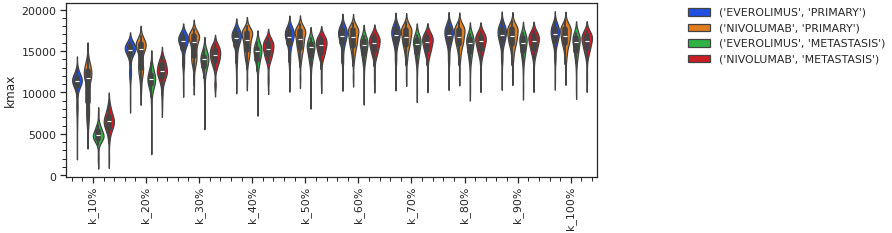

In [85]:
#'density', 'r2', 'node_count', 'edge_count', 'kmean', 'kmedian', 'kmax'
from matplotlib import pyplot as plt
import seaborn as sns
for i in cate:
    df_stat[i].astype(float)
    plt.figure(figsize=(15,3.5))
    sns.violinplot(data=df_stat, x="para_k", y=i, hue=df_stat[["Arm","Tumor_Sample_Primary_or_Metastasis"]].apply(tuple, axis=1))
    plt.legend([],[], frameon=False)
    plt.legend(bbox_to_anchor=(1.55, 1), borderaxespad=0)
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.tight_layout()
    plt.savefig(f's1_{i}_pm.svg',dpi=300)
    plt.show()
    plt.close() 

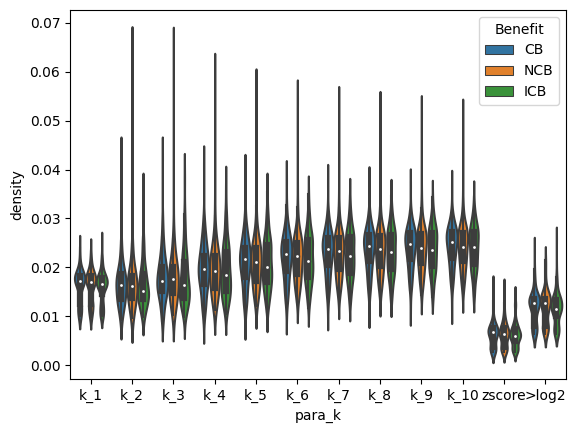

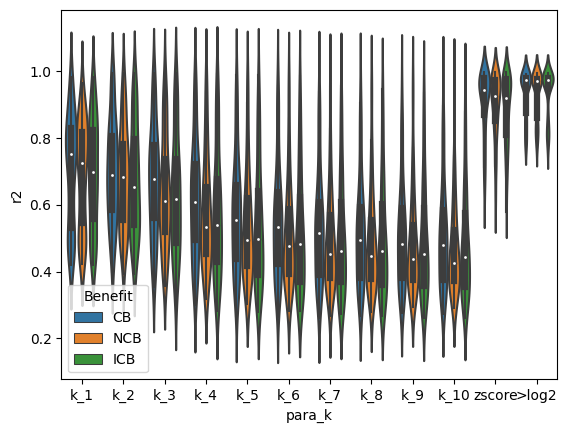

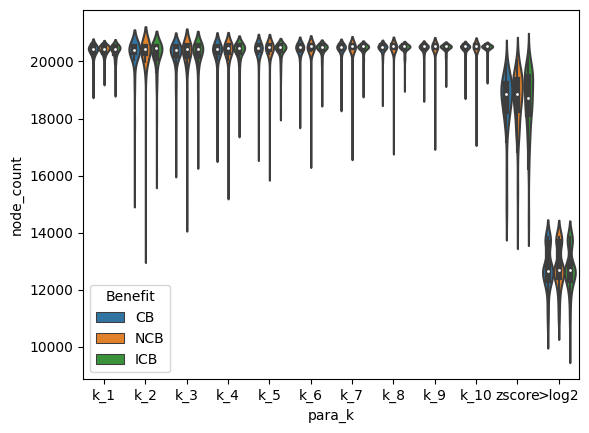

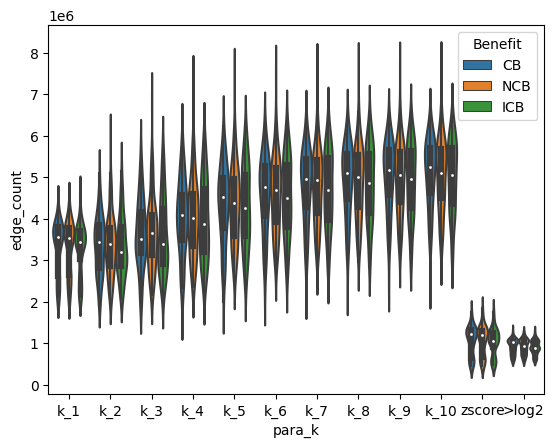

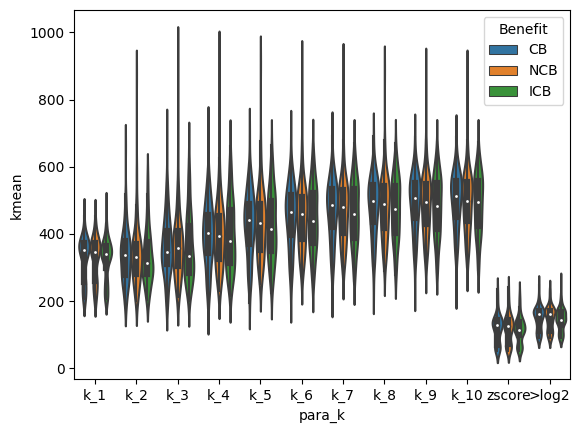

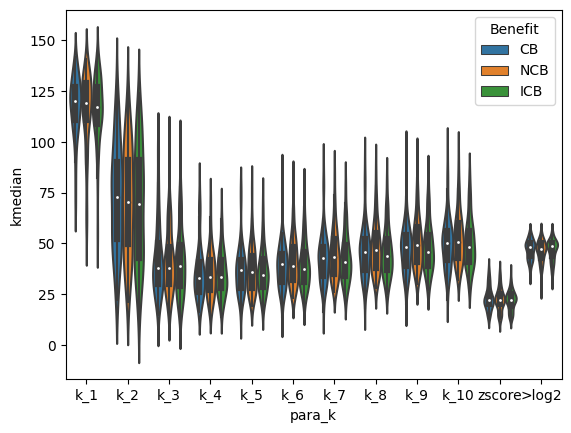

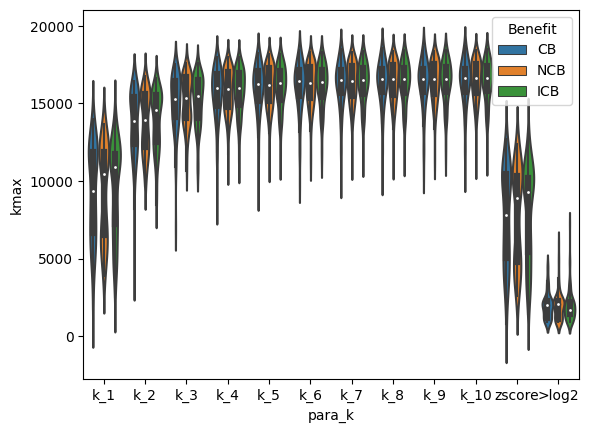

In [28]:
#'density', 'r2', 'node_count', 'edge_count', 'kmean', 'kmedian', 'kmax'
from matplotlib import pyplot as plt
import seaborn as sns
for i in cate:
    df_stat[i].astype(float)
    sns.violinplot(data=df_stat, x="para_k", y=i, hue="Benefit")
    plt.show()
    plt.close() 

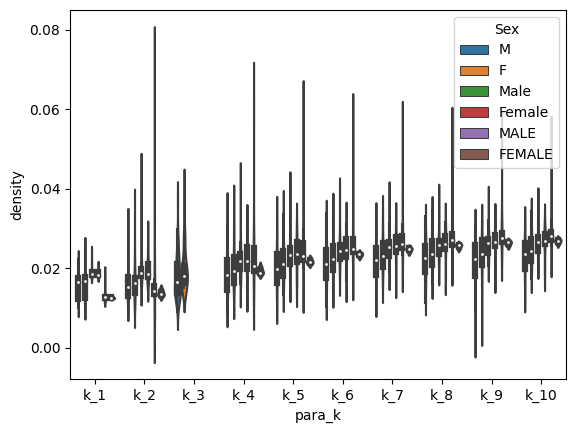

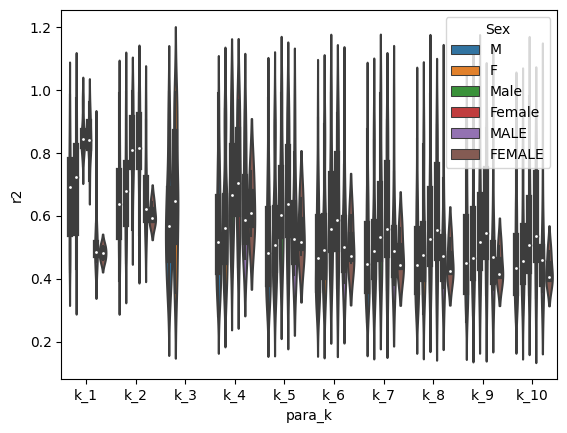

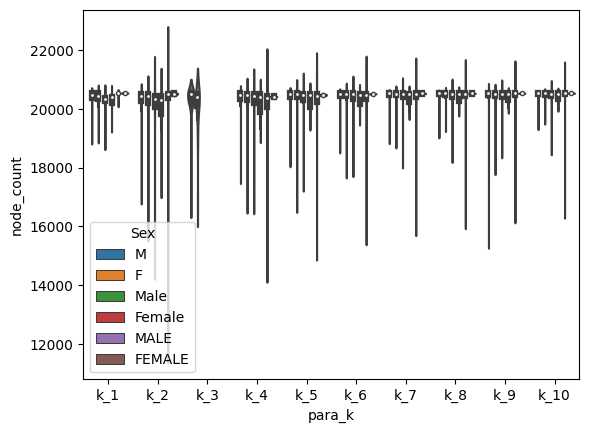

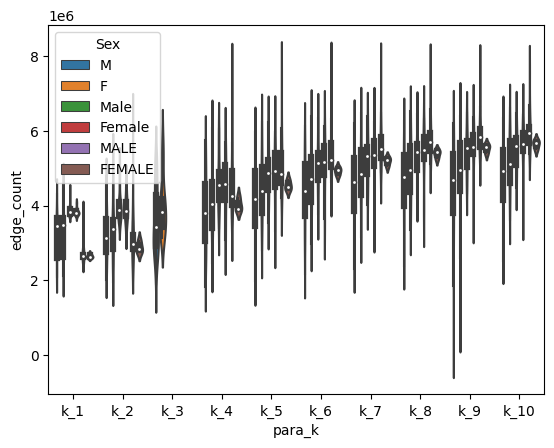

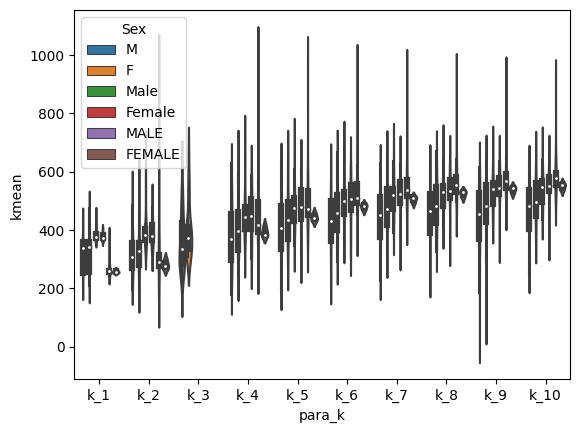

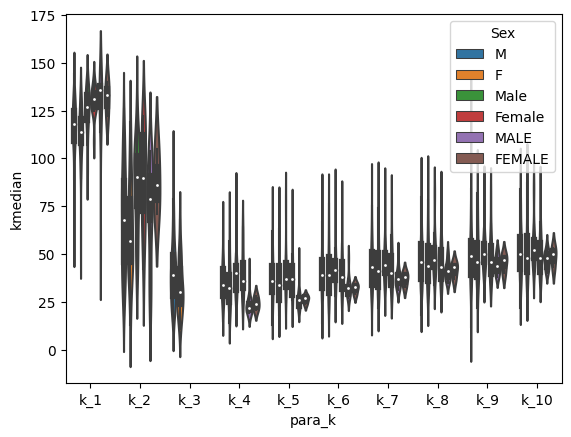

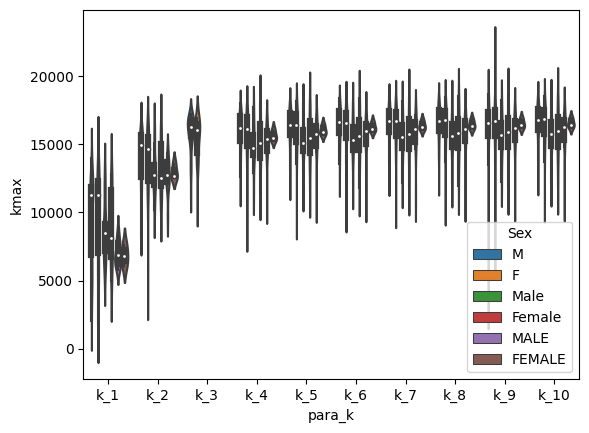

In [84]:
#'density', 'r2', 'node_count', 'edge_count', 'kmean', 'kmedian', 'kmax'
from matplotlib import pyplot as plt
import seaborn as sns
for i in cate:
    df_stat[i].astype(float)
    sns.violinplot(data=df_stat, x="para_k", y=i, hue="Sex")
    plt.show()
    plt.close() 